# Исследование данных о пользователях мобильного приложения 

**Описание проекта:**  

В нашем распоряжении данные о пользователях развлекательного мобильного приложения Procrastinate Pro+, привлечённых с 1 мая по 27 октября 2019 года. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Основная задача — разобраться в причинах и помочь компании выйти в плюс.

**Описание данных:**  
Данные хранятся в трёх датасетах:
- *visits_info_short.csv* — хранит логи сервера с информацией о посещениях сайта  
- *orders_info_short.csv* — содержит информацию о заказах  
- *costs_info_short.csv* — содержит информацию о расходах на рекламу

**Цели исследования:**  
- Выявить причины из-за которых компания терпит большие убытки
- Выяснить, откуда приходят пользователи и какими устройствами они пользуются  
- Посчитать, сколько стоит привлечение пользователей из различных рекламных каналов 
- Посчитать, сколько денег приносит каждый клиент
- Определить, в какой момент расходы на привлечение клиента окупаются  
- Определить, какие факторы мешают привлечению клиентов  
- Оценить окупаемость рекламы

**Ход исследования:**  

Исследование будет состоять из пяти этапов:
1. Обзор данных  
2. Предобработка данных
3. Исследовательский анализ данных
4. Маркетинг
5. Оценка окупаемости рекламы  
6. Итоги исследования 

## Обзор данных

### Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные:

In [2]:
# импорт библиотек:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [3]:
# прочитаем csv-файлы и сохраним данные в переменные:
visits = pd.read_csv('/datasets/visits_info_short.csv') # журнал сессий
orders = pd.read_csv('/datasets/orders_info_short.csv') # заказы
costs =  pd.read_csv('/datasets/costs_info_short.csv')  # траты на рекламу

### Выведем первые 5 строк каждого из датафреймов:

In [4]:
# датафрейм visits:
visits.head()

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40


In [5]:
# датафрейм orders:
orders.head()

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99


In [6]:
# датафрейм costs:
costs.head()

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1


### Выведем основную информацию о датафреймах с помощью метода info():

In [7]:
# датафрейм visits:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [8]:
# датафрейм orders:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [9]:
# датафрейм costs:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


**Вывод:**  Предоставленные данные содержат следующую информацию:  

**visits_info_short.csv:**  
•	User Id — уникальный идентификатор пользователя  
•	Region — страна пользователя  
•	Device — тип устройства пользователя  
•	Channel — идентификатор источника перехода  
•	Session Start — дата и время начала сессии  
•	Session End — дата и время окончания сессии  

**orders_info_short.csv:**  
•	User Id — уникальный идентификатор пользователя  
•	Event Dt — дата и время покупки  
•	Revenue — сумма заказа  

**costs_info_short.csv:**  
•	dt — дата проведения рекламной кампании  
•	Channel — идентификатор рекламного источника  
•	costs — расходы на эту кампанию 

На первом этапе выявлены следующие проблемы в исходных данных:
- нарушения в стиле заголовков
- некорректные типы данных в столбцах с датами

Устраним пошагово эти проблемы, чтобы подготовить данные к дальнейшему исследованию.

## Предобработка данных

### Работа с заголовками
#### Приведём названия столбцов к нижнему регистру и "змеиному стилю":

In [10]:
# датафрейм visits:
visits.columns = visits.columns.str.lower()
visits = visits.rename(columns={
                                'user id':'user_id', 
                                'session start': 'session_start',
                                'session end': 'session_end'
                               })
visits.columns

Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')

In [11]:
# датафрейм orders:
orders.columns = orders.columns.str.lower()
orders = orders.rename(columns={
                                'user id':'user_id', 
                                'event dt': 'event_dt'
                               })
orders.columns

Index(['user_id', 'event_dt', 'revenue'], dtype='object')

In [12]:
# датафрейм costs:
costs.columns = costs.columns.str.lower()
costs.columns

Index(['dt', 'channel', 'costs'], dtype='object')

### Работа с типами данных
####  Изменим типы данных в столбцах с различными датами и временем:

In [13]:
# преобразование данных о времени:
visits['session_start'] = pd.to_datetime(visits['session_start'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

### Работа с пропусками  

#### Проверим, есть ли пропущенные значения в датафреймах:

In [14]:
# датафрейм visits:
visits.isna().sum() 

user_id          0
region           0
device           0
channel          0
session_start    0
session_end      0
dtype: int64

In [15]:
# датафрейм orders:
orders.isna().sum() 

user_id     0
event_dt    0
revenue     0
dtype: int64

In [16]:
# датафрейм costs:
costs.isna().sum() 

dt         0
channel    0
costs      0
dtype: int64

**Вывод:** Пропусков в исходных данных не обнаружено.

### Работа с дубликатами
####  Проверим датафреймы на наличие явных дубликатов:

In [17]:
# датафрейм visits:
visits.duplicated().sum() 

0

In [18]:
# датафрейм orders:
orders.duplicated().sum() 

0

In [19]:
# датафрейм costs:
costs.duplicated().sum() 

0

**Вывод:** Явных дубликатов в исходных данных не обнаружено.  
####  Проверим столбцы с типом object на наличие неявных дубликатов:

In [20]:
# датафрейм visits:
print(visits['region'].unique())
print()
print(visits['device'].unique())
print()
print(visits['channel'].unique())

['United States' 'UK' 'France' 'Germany']

['iPhone' 'Mac' 'Android' 'PC']

['organic' 'TipTop' 'RocketSuperAds' 'YRabbit' 'FaceBoom' 'MediaTornado'
 'AdNonSense' 'LeapBob' 'WahooNetBanner' 'OppleCreativeMedia'
 'lambdaMediaAds']


In [21]:
# датафрейм costs:
print(costs['channel'].unique())

['FaceBoom' 'MediaTornado' 'RocketSuperAds' 'TipTop' 'YRabbit'
 'AdNonSense' 'LeapBob' 'OppleCreativeMedia' 'WahooNetBanner'
 'lambdaMediaAds']


**Вывод:** Проверка проведена только для датафреймов **visits** и **costs**, так как в датафрейме **orders** нет столбцов с типом object.  
Неявных дубликатов также не обнаружено.

## Подготовка к исследованию

Для исследования пользовательских метрик воспользуемся методами когортного анализа. Разделим наших пользователей на группы — когорты по выбранным признакам. С их помощью можно анализировать поведение разных групп клиентов и оценивать их значимость для бизнеса.  

Чтобы проще было делить клиентов на когорты, заранее составим их профили — таблицу с деталями первого посещения каждого пользователя, такими как источник перехода на сайт, страна, устройство. Также рассчитаем стоимость привлечения для клиентов.

### Напишем функцию *get_profiles()* для создания профилей пользователей:

In [22]:
# функция для создания пользовательских профилей:
def get_profiles(sessions, orders, ad_costs):

    # сортируем сессии по ID пользователя и дате посещения
    # группируем по ID и находим первые значения session_start, channel, device, region
    # столбец со временем первого посещения назовём first_ts
    # от англ. first timestamp — первая временная отметка

    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index() # возвращаем user_id из индекса
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

Чтобы выявить причины, из-за которых компания терпит большие убытки, рассчитаем и проаналируем ключевые пользовательские метрики: конверсия, удержание клиентов, «пожизненная ценность» клиента и окупаемость инвестиций, затраченных на клиента.

### Создадим функции для расчёта и анализа пользовательских метрик:

*- CR (Conversion Rate)* — коэффициент конверсии. Это метрика в процентах, которая указывает, сколько человек из общего числа пользователей совершили нужное целевое действие для компании     

*- Retention Rate* — коэффициент, который показывает, насколько хорошо бизнес удерживает постоянных клиентов в течение определенного промежутка времени  

*- LTV (Lifetime Value)* — общая сумма денег, которую клиент в среднем принёс компании за всё время взаимодействия с ней   

*- ROI (Return On Investment)* — коэффициент, отражающий возврат инвестиций в маркетинговые активности. Метрика показывает, заработала ли компания на продажах больше денег, чем вложила в продвижение продукта.

#### Шаг 1. Напишем функцию *get_conversion()* для расчёта конверсии:

In [23]:
# функция для расчёта конверсии:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### Шаг 2. Напишем функцию *get_retention()* для подсчёта уровня удержания пользователей:

In [24]:
# функция для расчёта удержания:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### Шаг 3. Напишем функцию *get_ltv()* для расчёта «пожизненной ценности» и окупаемости инвестиций на каждого клиента:

In [25]:
# функция для расчёта LTV и ROI:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)
## Исследовательский анализ данных
        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#### Шаг 4. Напишем функцию *plot_conversion()* для визуализации метрики расчёта конверсии и её динамики:

In [26]:
# функция для визуализации конверсии
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

#### Шаг 5. Напишем функцию *plot_retention()* для визуализации метрики удержания и её динамики:

In [27]:
# функция для визуализации удержания:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке - динамика удержания платящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2)
  
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

#### Шаг 6. Напишем функцию *plot_ltv_roi()* для визуализации метрик LTV, ROI и их динамики:

In [28]:
# функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

#### Шаг 7 Напишем функцию *filter_data()* для сглаживания датафрейма при построении графиков:

In [29]:
# функция для сглаживания фрейма:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

## Исследовательский анализ данных

### Составим профили пользователей
Для этого вызовем функцию get_profiles(), передав ей данные о посещениях, заказах и тратах на продвижение:

In [30]:
# получаем профили пользователей:
profiles = get_profiles(visits, orders, costs)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


### Определим доступный интервал привлечения пользователей:

In [31]:
# минимальная дата привлечения пользователей: 
min_analysis_date = profiles['dt'].min()
print('Минимальная дата привлечения пользователей:', min_analysis_date)

Минимальная дата привлечения пользователей: 2019-05-01


In [32]:
# максимальная дата привлечения пользователей: 
max_analysis_date  = profiles['dt'].max()
print('Максимальная дата привлечения пользователей:', max_analysis_date)

Максимальная дата привлечения пользователей: 2019-10-27


### Установим момент и горизонт анализа данных:
Согласно условиям проекта, на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения:

In [33]:
# момент анализа:
observation_date = datetime(2019, 11, 1).date()

# горизонт анализа:
horizon_days = 14

Для дальнейшего анализа напишем функцию, которая:
- сгруппирует пользователей по определенному признаку  
- подсчитает количество уникальных пользователей в группе
- подсчитает количество платящих пользователей среди уникальных

In [34]:
def user_analysis(data, cohort):
    report = data.groupby(cohort).agg({'user_id': 'nunique',  
     'payer': 'mean'}).sort_values(by='payer', ascending=False).reset_index()
    return report

### Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей

Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны:

In [35]:
user_analysis(profiles, profiles['region'])

,region,user_id,payer
0,United States,100002,0.069019
1,Germany,14981,0.041119
2,UK,17575,0.039829
3,France,17450,0.037994


**Вывод:**  Основная аудитория приложения - пользователи **США** (**100002** уникальных пользователя).  
На США также приходится и больше всего платящих пользователей (**6,9%**).

### Проверим, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи  

Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства:

In [36]:
user_analysis(profiles, profiles['device'])

,device,user_id,payer
0,Mac,30042,0.063644
1,iPhone,54479,0.062079
2,Android,35032,0.058518
3,PC,30455,0.050468


**Вывод:** Самая многочисленная группа пользуется устройствами **iPhone** (**54479** уникальных пользователя).  
Однако, обладатели iPhone на ≈ 0,16% отстают по количеству прибыли, которую они приносят компании.   
В этом аспекте лидирует группа пользователей **Mac** (**6,36%** платящих пользователей).

### Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей

Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения:

In [37]:
user_analysis(profiles, profiles['channel'])

,channel,user_id,payer
0,FaceBoom,29144,0.122049
1,AdNonSense,3880,0.113402
2,lambdaMediaAds,2149,0.104700
3,TipTop,19561,0.096007
4,RocketSuperAds,4448,0.079137
5,WahooNetBanner,8553,0.052964
6,YRabbit,4312,0.038265
7,MediaTornado,4364,0.035747
8,LeapBob,8553,0.030633
9,OppleCreativeMedia,8605,0.027077


**Вывод:** Больше всего в приложении органических пользователей (пришедших через обычные результаты поиска, а не с помощью платных рекламных объявлений). Однако эта группа приносит меньше всего прибыли компании (около **2%**).  

Что касается рекламных источников привлечения: здесь с большим отрывом лидирует канал **FaceBoom** (привлечено **29144** уникальных пользователя). Он же и приносит больше всего прибыли компаниии (**12,2%** платящих пользователей).

## Маркетинг

### Посчитаем общую сумму расходов на маркетинг:

In [38]:
sum_of_costs = round(costs['costs'].sum(), 1)
print(f'Общая сумма расходов на маркетинг:', sum_of_costs)

Общая сумма расходов на маркетинг: 105497.3


### Выясним, как траты на маркетинг распределены по рекламным источникам:

In [39]:
# сгруппируем расходы по рекламному источнику и просуммируем расходы
costs_by_channel = costs.groupby('channel').agg(
    {'costs': 'sum'}).sort_values(by='costs', ascending=False).reset_index()

# посчитаем долю каждого рекламного источника от общих расходов на маркетинг:
costs_by_channel['share_of_total'] = round((costs_by_channel['costs'] / sum_of_costs) * 100, 2)
costs_by_channel.style.background_gradient('coolwarm')

,channel,costs,share_of_total
0,TipTop,54751.300000,51.900000
1,FaceBoom,32445.600000,30.750000
2,WahooNetBanner,5151.000000,4.880000
3,AdNonSense,3911.250000,3.710000
4,OppleCreativeMedia,2151.250000,2.040000
5,RocketSuperAds,1833.000000,1.740000
6,LeapBob,1797.600000,1.700000
7,lambdaMediaAds,1557.600000,1.480000
8,MediaTornado,954.480000,0.900000
9,YRabbit,944.220000,0.900000


**Вывод:** Основные рекламные каналы компании: **TipTop** и **FaceBoom.**   
Половина рекламного бюджета уходит на канал **TipTop** (≈ **52%** от общей суммы расходов на маркетинг).  
Вторым по объему расходов является канал **FaceBoom** (около **30%** от общей суммы расходов на маркетинг).   

### Визуализируем динамику изменения расходов во времени (по неделям и месяцам) по каждому источнику:

In [40]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month

In [41]:
# считаем расходы по месяцу и источнику
costs_by_month = costs.groupby(['month', 'channel']).agg(
    {'costs': 'sum'}).reset_index()

# считаем расходы по неделям и источнику
costs_by_week = costs.groupby(['week', 'channel']).agg(
    {'costs': 'sum'}).reset_index()

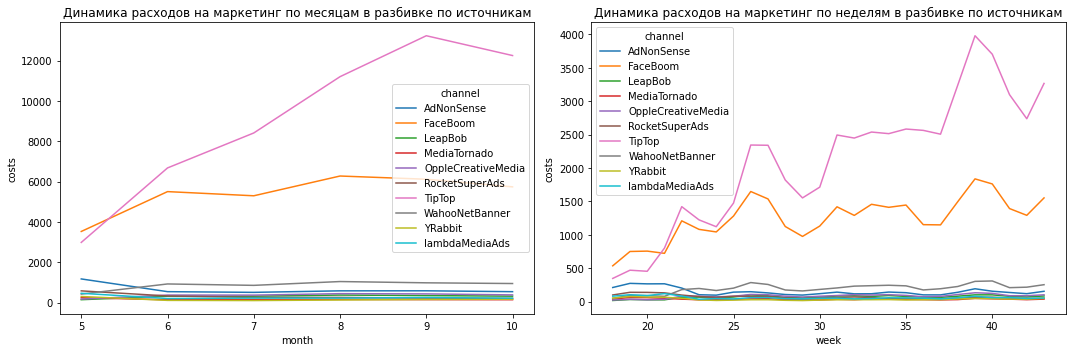

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

sns.lineplot(data=costs_by_month, x="month", y="costs", hue="channel",
             ax=axes[0]).set(title= f'Динамика расходов на маркетинг по месяцам в разбивке по источникам')

sns.lineplot(data=costs_by_week, x="week", y="costs", hue="channel",
             ax=axes[1]).set(title= f'Динамика расходов на маркетинг по неделям в разбивке по источникам')

plt.tight_layout()
plt.show()

**Вывод:** Первичные выводы также подтверждаются и графиками.   
Больше всего средств компания тратит на рекламные каналы **FaceBoom и TipTop.**   
Это прослеживается как в разбивке по месяцам, так и на понедельном графике динамики расходов.

### Рассчитаем среднюю стоимость привлечения одного пользователя (CAC) для всего проекта:

In [69]:
avg_cost = round(profiles.query('channel != "organic"')['acquisition_cost'].mean(), 2)
print('Cредняя стоимость привлечения одного пользователя:', avg_cost, 'долларов')

Cредняя стоимость привлечения одного пользователя: 1.13 долларов


### Посчитаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого рекламного источника, для разных типов устройств и разных регионов: 

In [46]:
# видоизменим функцию user_analysis для подсчета CAC:
def user_analysis(data, cohort):
    report = data.groupby(cohort).agg({'acquisition_cost': 'mean'
                                      }).sort_values(by='acquisition_cost', ascending=False).reset_index()
    return report

In [47]:
# считаем стоимость привлечения для разных типов устройств:
user_analysis(profiles, profiles['device'])

,device,acquisition_cost
0,Mac,0.802028
1,iPhone,0.801755
2,Android,0.641146
3,PC,0.501177


In [48]:
# считаем стоимость привлечения для разных регионов:
user_analysis(profiles, profiles['region'])

,region,acquisition_cost
0,United States,0.909268
1,Germany,0.295322
2,France,0.290887
3,UK,0.288393


**Выводы:**  
- Самым дорогим каналом привлечения пользователей является **TipTop** (**≈ 2,8 долларов** за одного пользователя)  
- Пользователи, привлеченные из канала **FaceBoom**, обходятся компании в **≈2,5** раза дешевле (**≈ 1,1 доллара** за одного пользователя)  
- Дороже всего компании обходится привлечение пользоватеелй **Mac и Android** (**0,8 доллара** за одного пользователя)  
- Бюджетнее всего обходится привлечение пользователей PC (**0,5 доллара** за одного пользователя)  
- Привлечение пользователей США обходится компании в ≈ 3 раза дороже, чем привлечение пользователей европейских стран

## Оценка окупаемости рекламы

Чтобы сделать выводы об окупаемости рекламы, посчитаем и визуализируем основные пользовательские метрики:  
- CR (Conversion Rate)  
- Retention Rate   
- LTV (Lifetime Value)  
- ROI (Return On Investment), а также посмотрим на динамику их изменения  


Всю оценку окупаемости рекламы для привлечения пользователей будем рассчитывать по пользователям, пришедшим с платныx рекламныx каналов.

### Исключим профили органических пользователей для дальнейшего расчета метрик:

In [49]:
# сохраним профили пользователей, пришедших с платных рекламных каналов, в переменную ad_profiles:
ad_profiles = profiles.query('channel != "organic"')

### Расчет и визуализация метрик LTV, ROI, CAC  
Вызовем функции *get_ltv()* и *plot_ltv_roi()* для расчёта LTV, ROI, CAC и визуализации метрик:

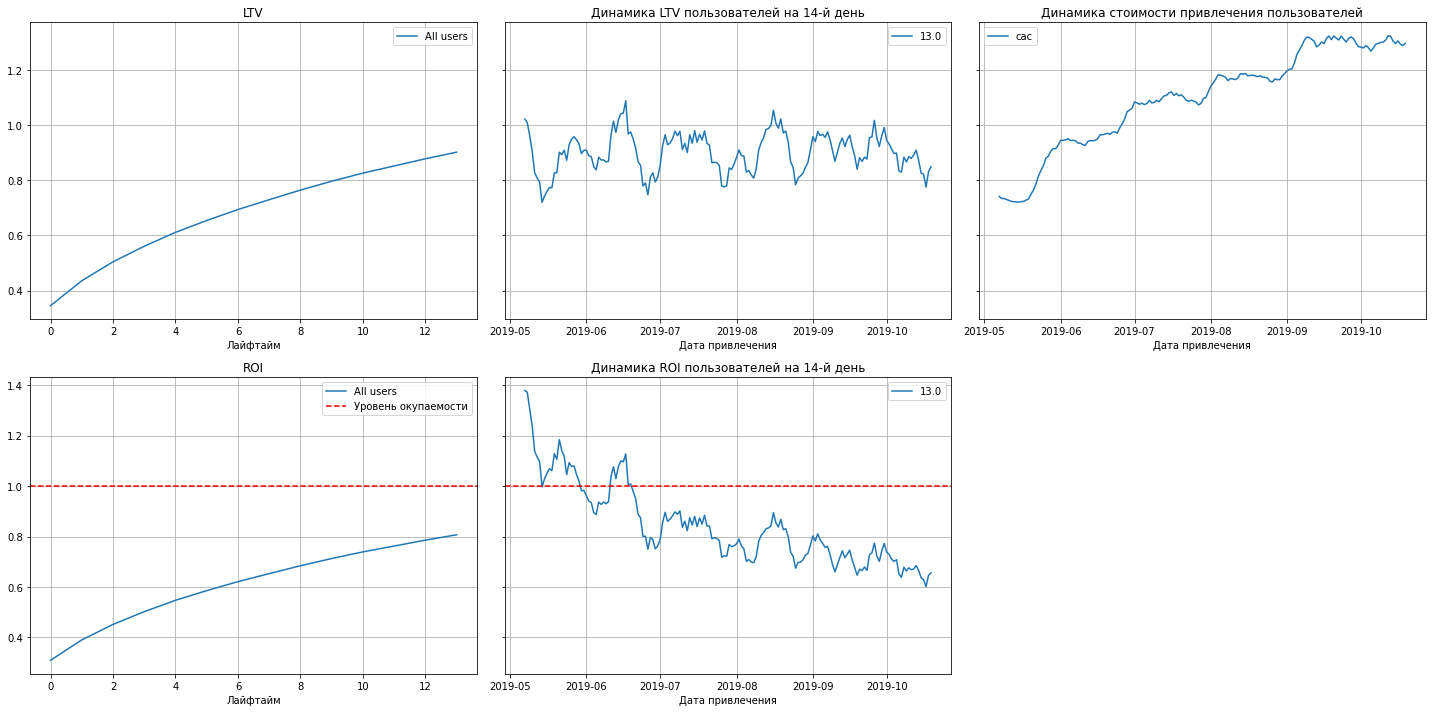

In [50]:
# считаем LTV и ROI:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    ad_profiles, orders, observation_date, horizon_days)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Вывод:** По графикам можно сделать такие выводы:  
- Реклама не окупается 
- Расходы на рекламу регулярно увеличивается (постоянный рост показателей CAC)
- Показатель LTV достаточно стабилен. Значит с "качеством" пользователей все в порядке. 

Чтобы разобраться в причинах, пройдёмся по всем доступным характеристикам пользователей — устройству, стране, рекламному источнику, откуда был привлечён пользователь.

### Проанализируем окупаемость рекламы с разбивкой по устройствам
Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI:

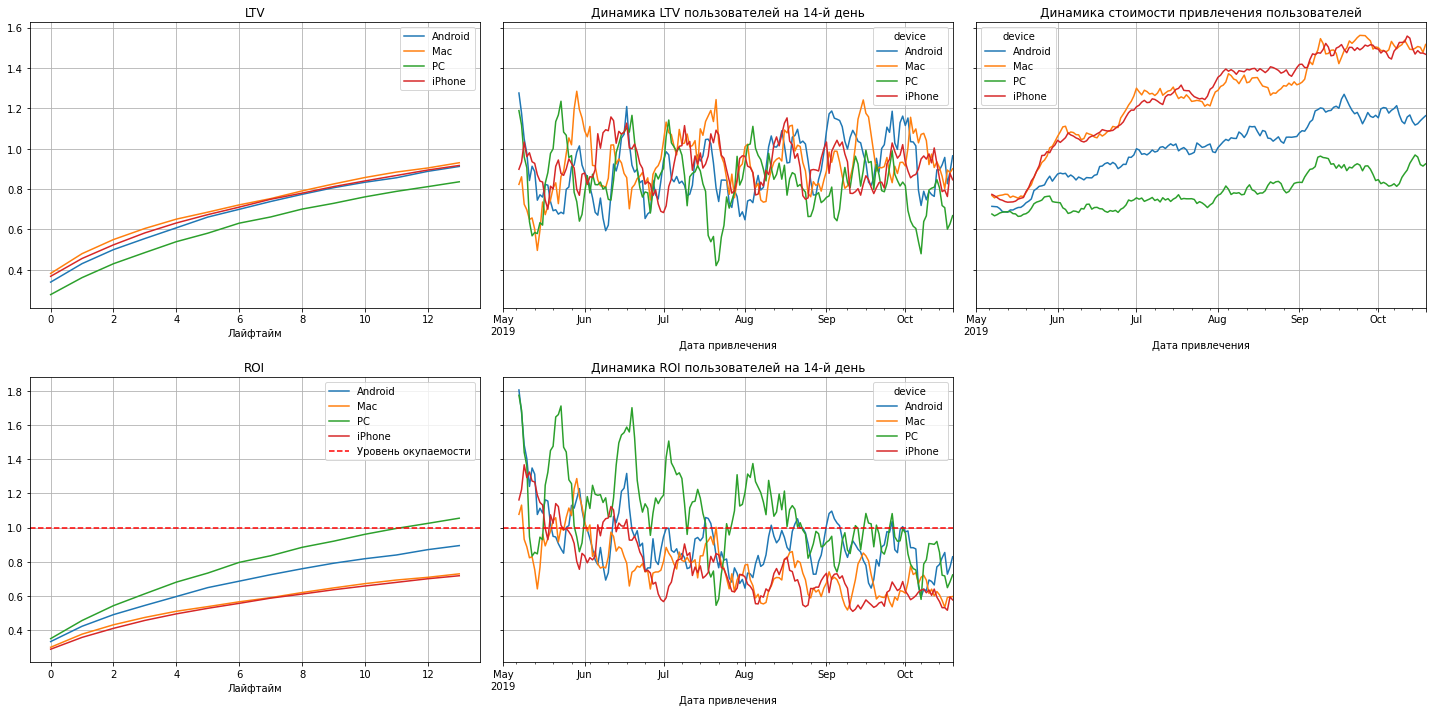

In [51]:
# считаем LTV и ROI:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    ad_profiles, orders, observation_date, horizon_days, dimensions=['device'])

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Вывод:**  С разбивкой по устройствам ситуация проясняется. Разберем каждый из показателей:  

**Окупаемость (ROI)**: 
- Быстрее всего окупается реклама для пользователей PC - на 11й "день жизни"  
- Реклама для пользователей Android, Mac и Iphone **не окупается** даже к концу 14 "дня жизни" пользователей  

**Стоимость привлечения пользователей (CAC):**  
- Дороже всего компании обходится привлечение пользователей Iphone и Mac  
- Дешевле всего компании обходится привлечение пользователей PC  
- Промежуточное положение по стоимости привлечения занимают пользователи Android  
- Расходы на привлечение пользователей регулярно растут

**LTV:**
- Пользователи PC имеют незначительно ниже данный показатель, чем пользователи остальных устройств
- У всех пользователей наблюдается стабильный рост показателя, включая пользователей PC

### Проанализируем окупаемость рекламы с разбивкой по странам
Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI:

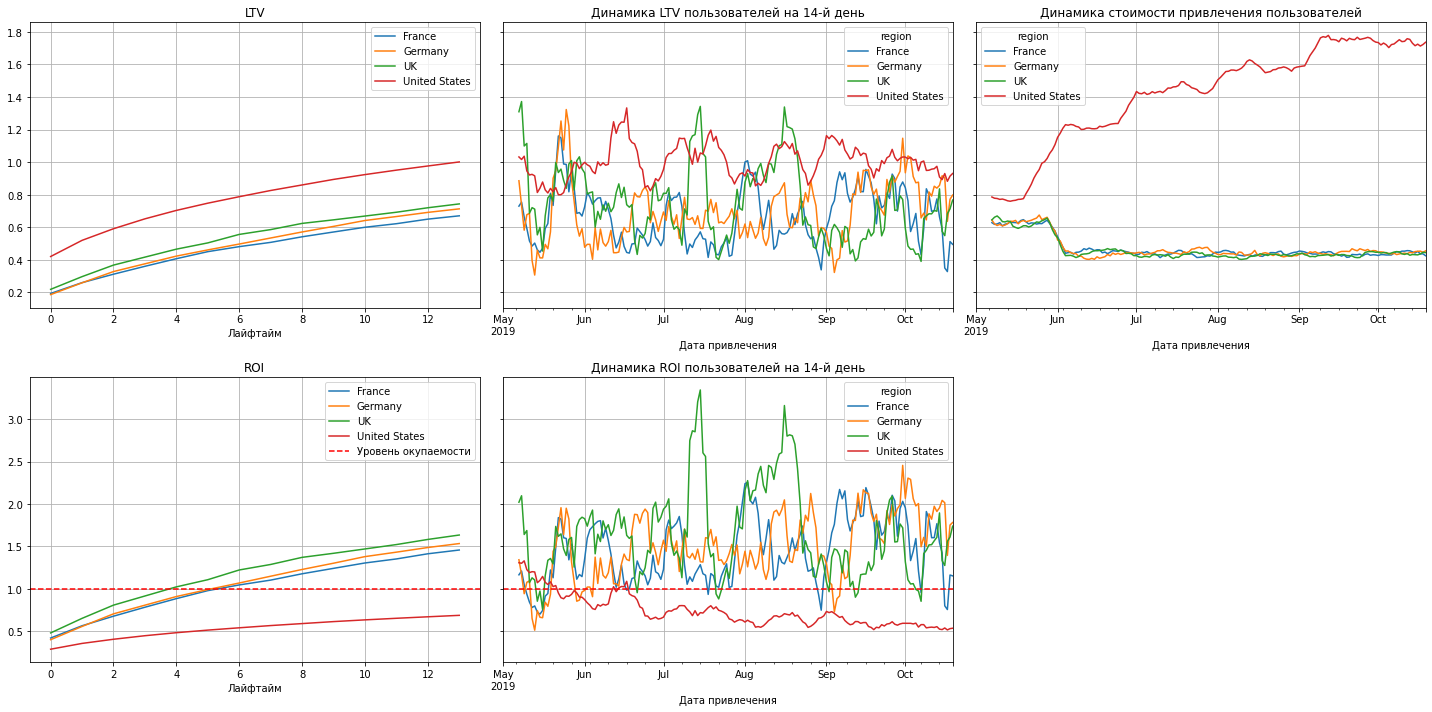

In [52]:
# считаем LTV и ROI:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    ad_profiles, orders, observation_date, horizon_days, dimensions=['region'])

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Вывод:** Разбивка по странам выявила следующие особенности:  
- Во всех странах, кроме США, реклама окупается на 4-5 "день жизни" клиента  
- Реклама для пользователей США **не окупается** даже к концу 14 "дня жизни" пользователей  
- Стоимость привлечения начиная с июня 2019 стабильна и одинакова для всех стран, кроме США  
- Пользователи США имеют самый высокий показатель LTV по сравнению с другими странами  

Выявлена потенциальная причина, почему компания терпит большие убытки. Деньги, выделяемые на привлечение пользователей США, по всем показателям расходуются неэффективно. Предлагаю рассмотреть окупаемость с разбивкой по рекламным каналам отдельно пользователей США и отдельно для пользователей европейских стран.

### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам (США)
Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI для пользователей США:

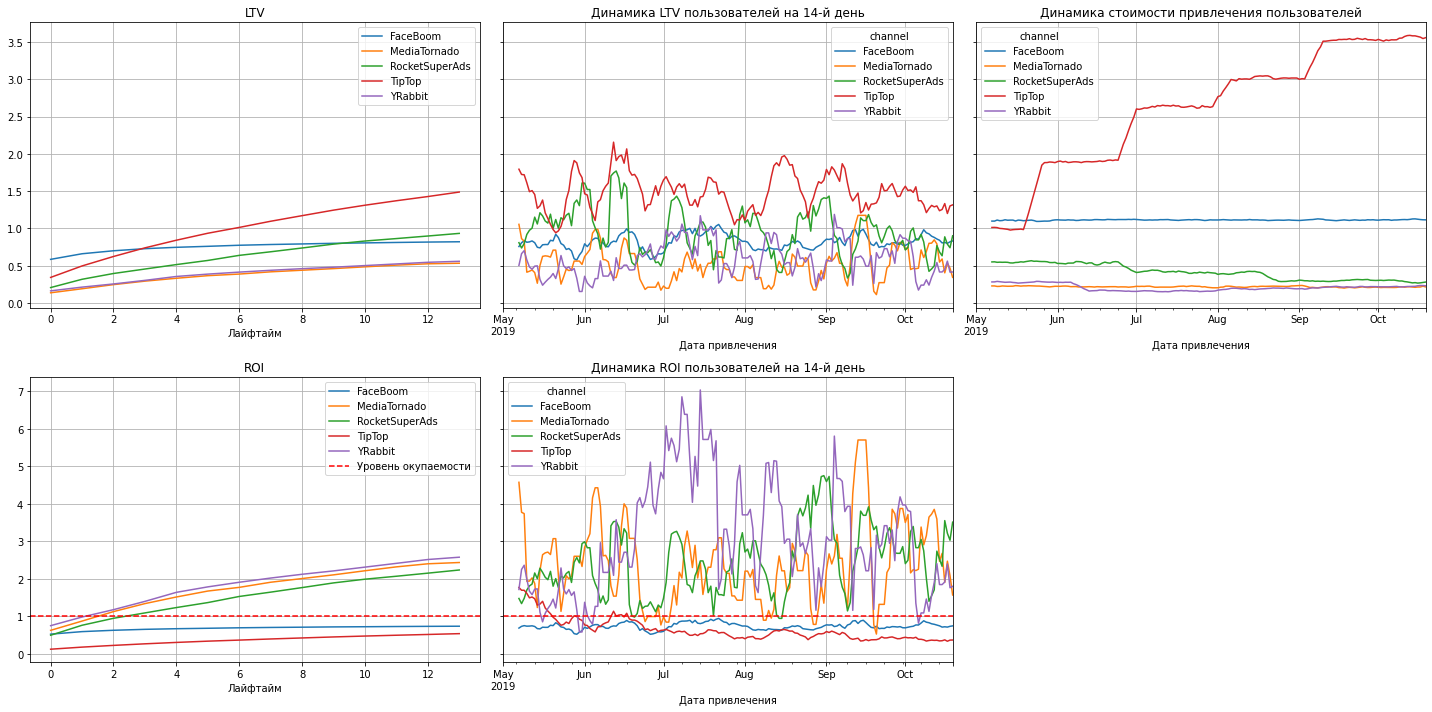

In [53]:
# сохраним отдельно профили платящих пользователей США:
us_users = ad_profiles.query('region == "United States"')

# считаем LTV и ROI:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    us_users, orders, observation_date, horizon_days, dimensions=['channel'])

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Выводы:** Разбивка по рекламным каналам для пользователей США выявила следующие особенности:  
 
- Каналы **FaceBoom и TipTop** единственные, кто не окупаются к концу исследуемого периода  
- Остальные каналы окупаются уже на 2й "день жизни" пользователей   
- Самым дорогим каналом привлечения пользователей является **TipTop**  
- Расходы на привлечение пользователей через **TipTop** растут почти в 2 раза с каждым новым месяцем  
- Канал **FaceBoom** имеет высокую по сравнению с остальными, но стабильную стоимость привлечения пользователей  
- Самый высокий показатель LTV у пользователей, привлеченных через канал **TipTop**  





### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам (Европа)
Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI для пользователей европейских стран:

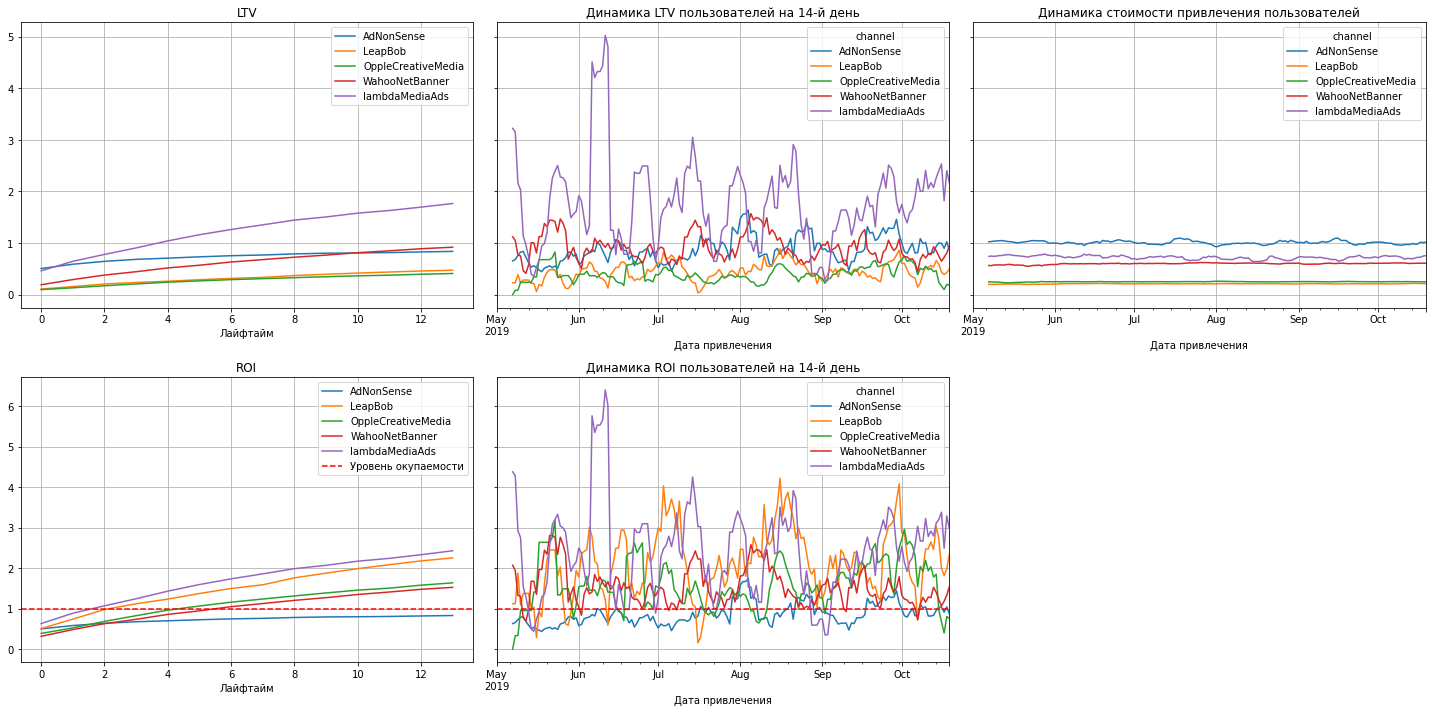

In [54]:
# сохраним отдельно профили пользователей европейских стран:
eu_users = ad_profiles.query('region != "United States"')

# считаем LTV и ROI:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    eu_users, orders, observation_date, horizon_days, dimensions=['channel'])

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**Выводы:** Разбивка по рекламным каналам для пользователей европейских стран выявила следующие особенности:  
 
- Быстрее всего окупаются каналы **lambdaMediaAds** и **LeapBob** (уже на 2й "день жизни" пользователей)  
- **AdNonSense** единственный рекламный канал, который **не окупается**  
- Самым дорогим каналом привлечения пользователей является **AdNonSense**  
- Бюджетнее всего обходится привлечение пользователей через каналы **OppleCreativeMedia** и **LeapBob**  
- Расходы на привлечение пользователей европейских стран стабильны   
- Самый высокий показатель LTV у пользователей, привлеченных через канал **lambdaMediaAds**  


**Промежуточный итог:**  

Анализ окупаемости рекламы показал, что для определения корректных причин, по которым компания терпит убытки, стоит рассматривать отдельно пользователей разных регионов, так как у них могут отличаться поведение, предпочтения и работающие рекламные каналы.  

В США:  
- Реклама **не окупается** для пользователей устройств Iphone и Mac, а также рекламных каналов FaceBoom и TipTop  
- Самый дорогой канал привлечения - **TipTop**, и расходы на него увеличиваются почти в 2 раза с каждым новым месяцем  

В Европейских странах:  
- Реклама **не окупается** только в канале **AdNonSense**  
- Каналы **lambdaMediaAds** и **LeapBob** окупаются уже на 2й "день жизни" пользователей  
- Самый дорогой канал привлечения - **AdNonSense**   
- Бюджетнее всего обходится привлечение пользователей через каналы **OppleCreativeMedia** и **LeapBob**   


Проверим, с чем может быть связана плохая окупаемость рекламы: с низкой конверсией или низким удержанием пользователей.   
Расчитаем и визуализируем конверсию и удержание в разбивке по странам, по устройствам и по рекламным каналам. 

### Расчет и визуализация конверсии пользователей в разбивке по странам

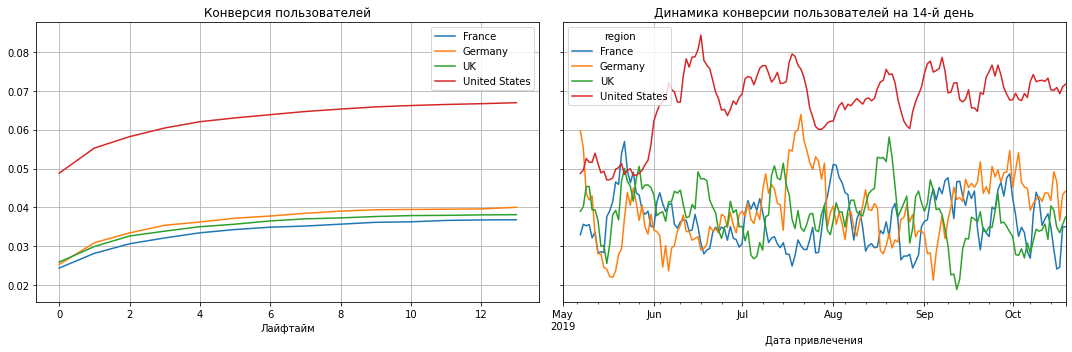

In [55]:
# 1. Разбивка по странам:
# считаем конверсию:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=['region'])

# строим график конверсии и динамику её изменения:
plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод:** Пользователи всех стран хорошо и стабильно конвертируются.  
У пользоватей США показатель конверсии немного выше, чем пользователей у европейских стран.

### Расчет и визуализация конверсии пользователей в разбивке по устройствам и рекламным каналам (Пользователи США)

In [56]:
# сохраним отдельно профили всех пользователей США:
us_users = profiles.query('region == "United States"')

Вызовем последовательно функции *get_conversion()* и *plot_conversion()*:

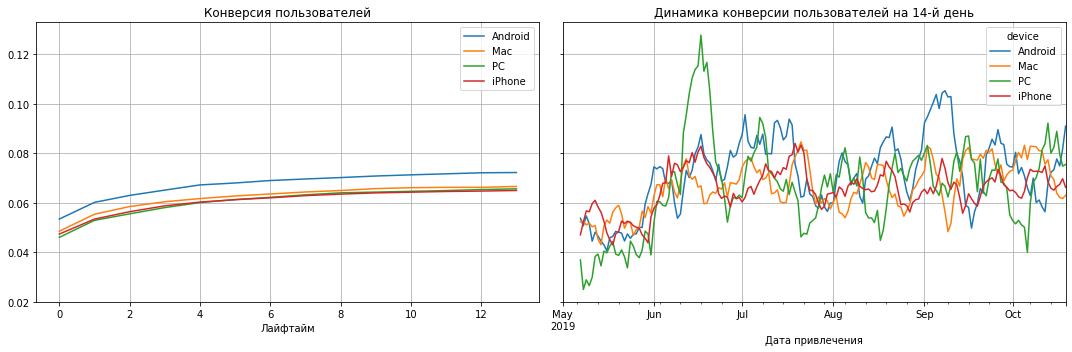

In [57]:
# 2. Разбивка по устройствам (США):
# считаем конверсию:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    us_users, orders, observation_date, horizon_days, dimensions=['device'])

# строим график конверсии и динамику её изменения:
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Вывод:** Пользователи всех устройств конвертируются хорошо. Немного лучше остальных конвертируются пользователи Android. 

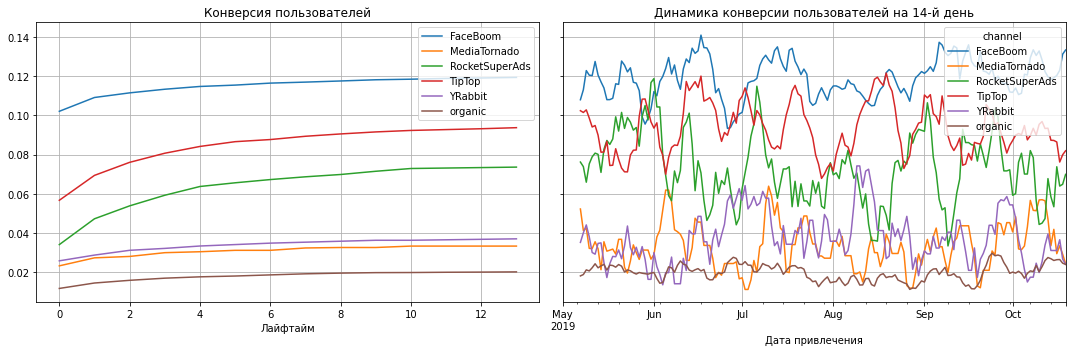

In [58]:
# 3. Разбивка по рекламным каналам (США):
# считаем конверсию:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    us_users, orders, observation_date, horizon_days, dimensions=['channel'])

# строим график конверсии и динамику её изменения:
plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод:** Разбивка по рекламным каналам также не выявила проблем с конверсией.  
Лучше всего конвертируются пользователи **FaceBoom**, **TipTop** и **RocketSuperAds**.  

Проверим конверсию в разбивке по устройствам и рекламным каналам для пользователей европейских стран.

### Расчет и визуализация конверсии пользователей в разбивке по устройствам и рекламным каналам (Пользователи европейских стран)

In [59]:
# сохраним отдельно профили всех пользователей европейских стран:
eu_users = profiles.query('region != "United States"')

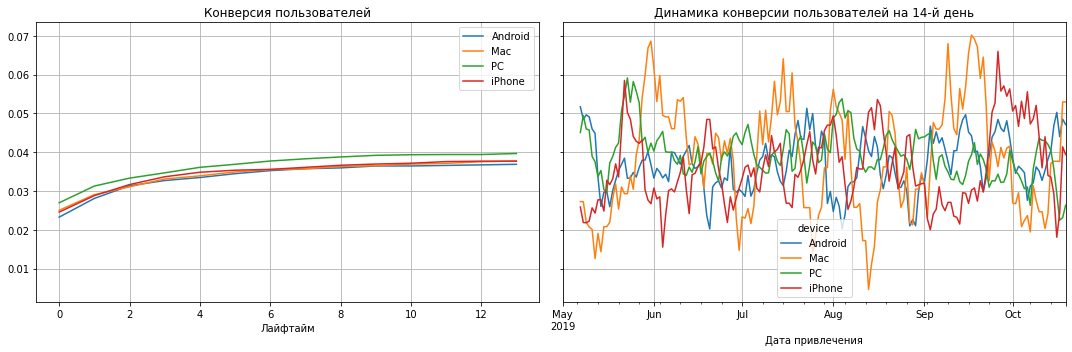

In [60]:
# 3. Разбивка по устройствам (европейские страны):
# считаем конверсию:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    eu_users, orders, observation_date, horizon_days, dimensions=['device'])

# строим график конверсии и динамику её изменения:
plot_conversion(conversion_grouped, conversion_history, horizon_days) 

**Вывод:** Пользователи всех устройств одинаково хорошо конвертируются. 

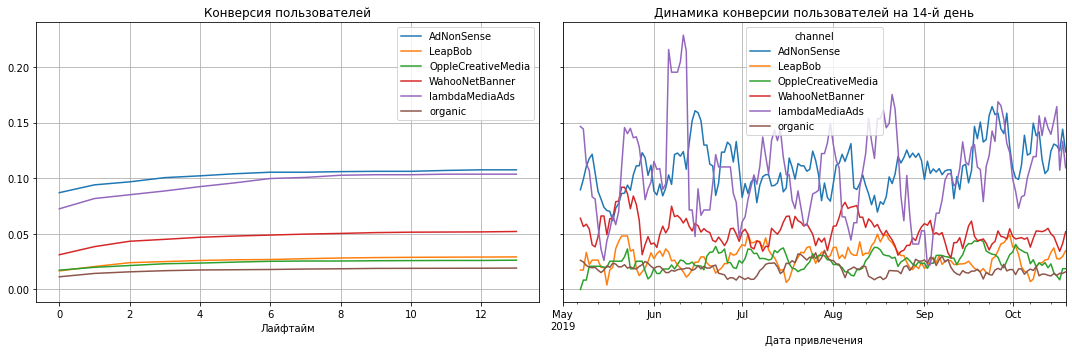

In [61]:
# 5. Разбивка по рекламным каналам (европейские страны):
# считаем конверсию:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    eu_users, orders, observation_date, horizon_days, dimensions=['channel'])

# строим график конверсии и динамику её изменения:
plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод:** Разбивка по рекламным каналам также не выявила проблем с конверсией.  
Лучше всего конвертируются пользователи **AdNonSense** и **lambdaMediaAds**.  


Скорее всего, проблема кроется в удержании. Вызовем функции *get_retention()* и *plot_retention()*, чтобы рассчитать и отразить на графиках этот показатель.

### Расчет и визуализация удержания пользователей в разбивке по странам

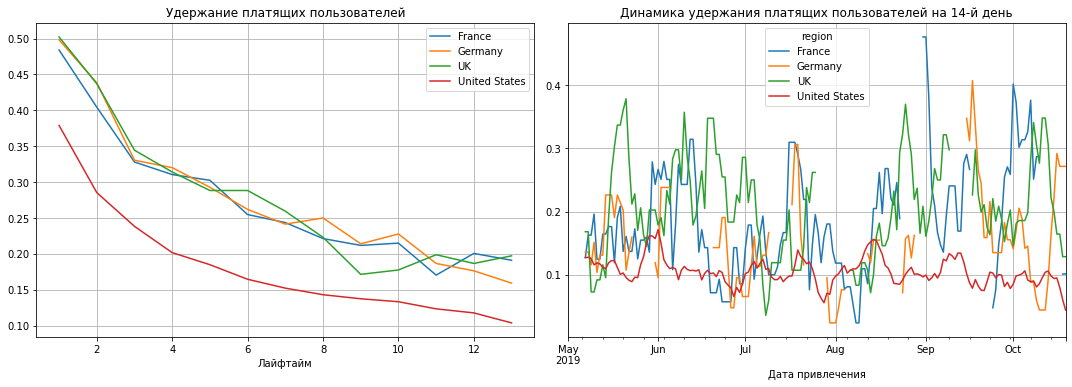

In [62]:
# 1. Разбивка по странам:
# считаем удержание:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=['region'])

# строим график удержания и динамику его изменения:
plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:** Пользователи всех стран стабильно плохо удерживаются. Хуже всего обстоят дела с удержанием пользователей США.

### Расчет и визуализация удержания пользователей в разбивке по устройствам и рекламным каналам (Пользователи США)

Вызовем функции *get_retention()* и *plot_retention()*:

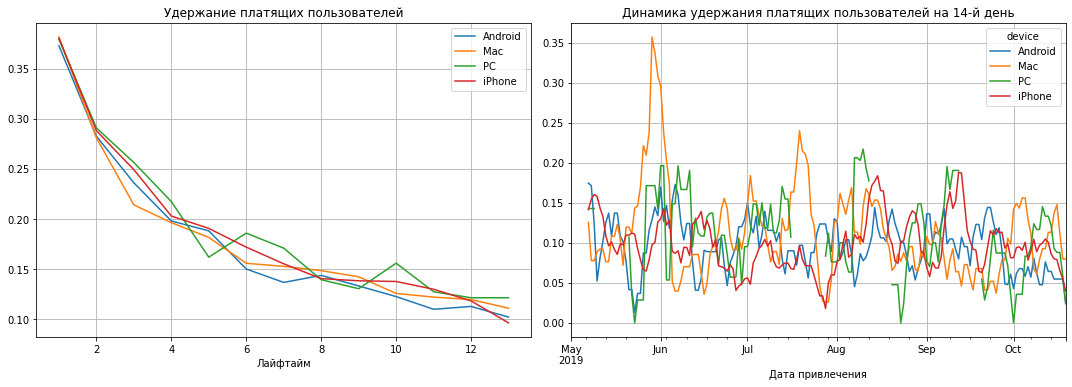

In [63]:
# 2. Разбивка по устройствам (США):
# считаем удержание:
retention_raw, retention_grouped, retention_history = get_retention(
    us_users, visits, observation_date, horizon_days, dimensions=['device'])

# строим график удержания и динамику его изменения:
plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:** Пользователи всех устройств одинаково плохо удерживаются. 

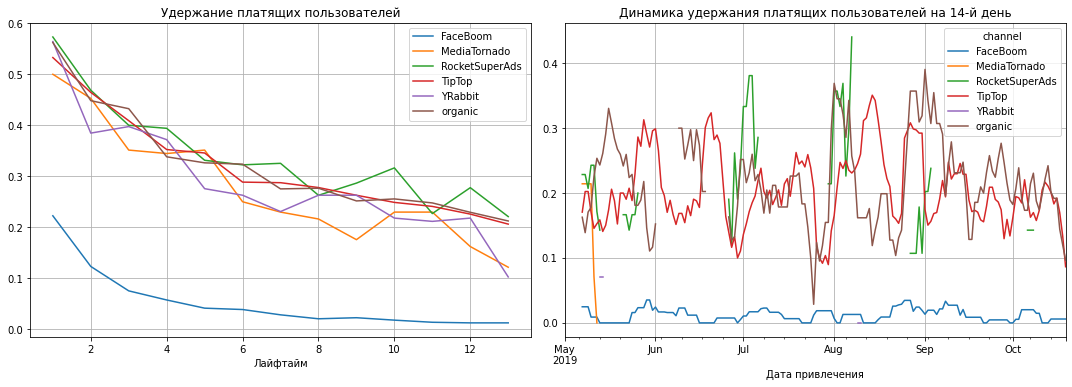

In [64]:
# 3. Разбивка по рекламным каналам (США):
# считаем удержание:
retention_raw, retention_grouped, retention_history = get_retention(
    us_users, visits, observation_date, horizon_days, dimensions=['channel'])

# строим график удержания и динамику его изменения:
plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:** Хуже всего удерживаются пользователи, привлеченные через канал **FaceBoom**.  
Проверим удержание в разбивке по устройствам и рекламным каналам для пользователей европейских стран.

### Расчет и визуализация удержания пользователей в разбивке по устройствам и рекламным каналам (Пользователи европейских стран)

Вызовем функции *get_retention()* и *plot_retention()*:

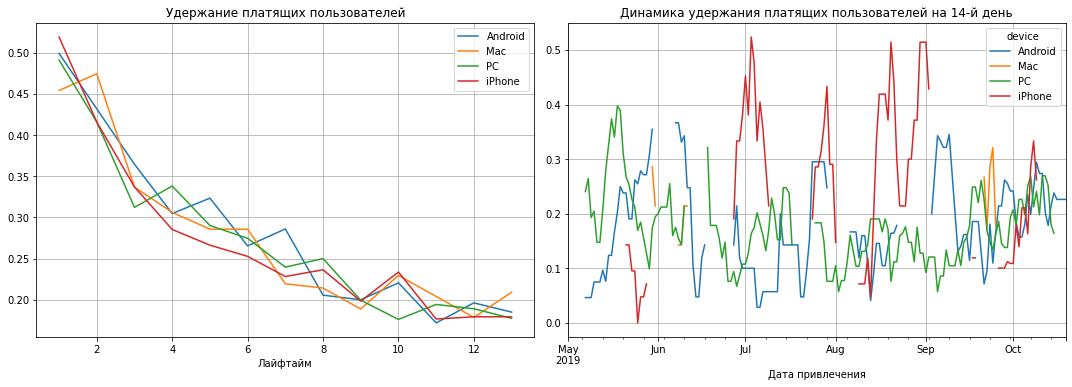

In [65]:
# 4. Разбивка по устройствам (европейские страны):
# считаем удержание:
retention_raw, retention_grouped, retention_history = get_retention(
    eu_users, visits, observation_date, horizon_days, dimensions=['device'])

# строим график удержания и динамику его изменения:
plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод:** Пользователи всех устройств одинаково плохо удерживаются.

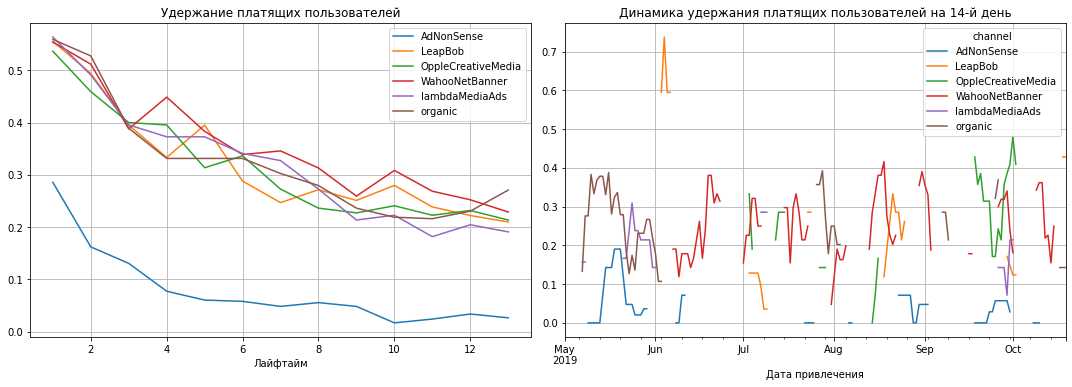

In [66]:
# 5. Разбивка по рекламным каналам (европейские страны):
# считаем удержание:
retention_raw, retention_grouped, retention_history = get_retention(
    eu_users, visits, observation_date, horizon_days, dimensions=['channel'])

# строим график удержания и динамику его изменения:
plot_retention(retention_grouped, retention_history, horizon_days)

**Вывод:** Хуже всего удерживаются пользователи, привлеченные через канал **AdNonSense**.  

## Итоги исследования

Исследование состояло из пяти этапов:  

**1. Обзор данных:**
- Получена общая информация о датафреймах
- Сформировано первое представление об исходных данных

**2. Предобработка данных:**  
- Исправлены ошибки в стиле заголовков
- Преобразованы типы данных в столбцах, где это было необходимо
- Проведена проверка на наличие пропусков  
- Проведена проверка на наличие дубликатов
- Заданы функции для создания профилей пользователей и расчёта пользовательских метрик (конверсия, удержание клиентов, «пожизненная ценность» клиента, окупаемость инвестиций) и их визуализации

**3. Исследовательский анализ данных:**
- Составлены профили пользователей  
- Определены минимальная и максимальная даты привлечения пользователей  
- Определено, из каких стран пользователи приходят в приложение  
- Определено, на какую страну приходится больше всего платящих пользователей  
- Определено, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи  
- Изучены рекламные источники привлечения и определены каналы, из которых пришло больше всего платящих пользователей

**4. Маркетинг:**
- Посчитана общая сумма расходов на маркетинг  
- Определено, сколько денег потрачено на каждый рекламный источник  
- Построена визуализация динамики изменения расходов во времени (по неделям и месяцам) по каждому рекламному источнику  
- Посчитана средняя стоимость привлечения одного пользователя (CAC) из каждого рекламного источника, для разных типов устройств и разных регионов  

**5. Оценка окупаемости рекламы:**  
- Расчитаны ключевые пользовательские метрики: CR, Retention Rate, LTV, CAC и ROI  
- Построены графики по расчитанным метрикам и динамике их изменения  
- Построены визуализации ключевых пользовательских метрик в разбивке по устройствам, по странам, по рекламным каналам
- Дана оценка окупаемости рекламы в зависимости от страны пользователя, используемого устройства и канала привлечения  

### Подведем финальный итог:
- Реклама, направленная на привлечение пользователей в целом **не окупается** к концу исследуемого периода (14 дней)  
- Расходы на рекламу и привлечение пользователей регулярно растут  
- Негативное влияние на окупаемость рекламы могут оказывать:
1) Пользователи **США**  
2) Пользователи **Iphone** и **Mac**  
2) Рекламные каналы  **FaceBoom** и **TipTop**, **AdNonSense**    
- Проблемы окупаемости могут быть вызваны плохим удержанием пользователей  

Это может быть связано со следующими причинами:  
- Пользователям не видят ценности в приложении (немотивированно высокая стоимость)  
- Пользователям не интересно само приложение (некачественный контент)  
- Неблагоприятное первое впечатление (сложный запутанный интерфейс или изначальная настройка приложения)  
- Излишнее давление на пользователей (навязчивость, регулярные уведомления)    
- Технические проблемы в приложении (ошибки, низкая скорость загрузки)
- Несоответствие приложения заявленной функциональности  
- Приложение не выделяется на фоне конкурентов    
- Отсутствие сегментации пользователей и стратегии по их удержанию  

**Рекомендации для отдела маркетинга компании:**  
- Переориентировать рекламу на пользователей европейских стран (сейчас количество пользователей в Германии, Великобритании и Франции суммарно ≈ **в 2 раза меньше**, чем пользователей США)  
- Развивать удержание органических пользователей и конвертировать их в платящих (самая большая аудитория приложения)  
- Отказаться или значительно уменьшить бюджет, выделяемый на рекламу в **FaceBoom**, **TipTop** и **AdNonSense** (самые дорогие рекламные источники и единственные источники, реклама в которых не окупается)   
- Развивать и делать акцент на **десктопной** версии приложения (самая низкая стоимость привлечения и самая быстрая окупаемость)
- Обратить внимание на перспективные каналы **lambdaMediaAds** и **LeapBob** (быстрая окупаемость и небольшие затраты на привлечение)